<a href="https://colab.research.google.com/github/yugonojima/MUFG-Data-Science-Champion-Ship-2023/blob/main/Stacking_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Signate/MUFG Data Science Champion Ship 2023/train.csv',index_col='index')
user = pd.read_csv('/content/drive/MyDrive/Signate/MUFG Data Science Champion Ship 2023/user.csv')
card = pd.read_csv('/content/drive/MyDrive/Signate/MUFG Data Science Champion Ship 2023/card.csv')
test = pd.read_csv('/content/drive/MyDrive/Signate/MUFG Data Science Champion Ship 2023/test.csv',index_col='index')

In [ ]:
train = train.merge(card, on=['user_id','card_id'], how='left')
train = train.merge(user, on=['user_id'], how='left')
test_index = test.index
test = test.merge(card, on=['user_id','card_id'], how='left')
test = test.merge(user, on=['user_id'], how='left')
test = test.set_index(test_index)

In [ ]:
train.head()

,user_id,card_id,amount,errors?,is_fraud?,merchant_id,merchant_city,merchant_state,zip,mcc,use_chip,card_brand,card_type,expires,has_chip,cards_issued,credit_limit,acct_open_date,year_pin_last_changed,current_age,retirement_age,birth_year,birth_month,gender,address,city,state,zipcode,latitude,longitude,per_capita_income_zipcode,yearly_income_person,total_debt,fico_score,num_credit_cards
0,1721,0,$2.623,OK,0,209237,Joliet,IL,60436.0,5541,Swipe Transaction,Mastercard,Credit,10/2021,YES,1,$6900,09/1995,2009,61,65,1958,5,Male,206 Pine Lane,Joliet,IL,60436,41.52,-88.12,$17567,$35823,$96691,732,3
1,1629,3,$6.4,OK,0,2568,Edgerton,WI,53534.0,5814,Swipe Transaction,Mastercard,Debit (Prepaid),12/2022,YES,2,$110,06/1999,2017,50,69,1969,4,Female,8886 Little Creek Street,Edgerton,WI,53534,42.83,-89.07,$21348,$43529,$126175,797,6
2,655,3,$123.5,OK,0,345310,Ridgefield,WA,98642.0,7538,Swipe Transaction,Mastercard,Debit,05/2024,YES,1,$24090,09/1998,2009,56,68,1963,7,Male,273 Ocean Street,Ridgefield,WA,98642,45.79,-122.69,$27308,$55682,$82696,750,4
3,492,0,$51.287,OK,0,4295,Milton,FL,32583.0,5912,Chip Transaction,Visa,Credit,03/2022,YES,1,$10300,04/1993,2013,68,65,1951,3,Female,7276 Valley Drive,Sioux Falls,SD,57107,43.54,-96.73,$20153,$39082,$16870,722,4
4,1969,4,$17.561,OK,0,350447,Irvington,NJ,7111.0,4214,Swipe Transaction,Visa,Debit,06/2023,YES,1,$11592,08/1998,2015,59,68,1960,3,Female,5238 Park Street,Union City,NJ,7087,40.76,-74.03,$16770,$34190,$39242,810,7


Create Features

In [ ]:
train['whether_work'] = train['retirement_age'] - train['current_age']
test['whether_work'] = test['retirement_age'] - test['current_age']

In [ ]:
train_x_a = train.drop(['is_fraud?', 'user_id', 'card_id', 'merchant_id', 'zip', 'cards_issued', 'acct_open_date', 'birth_year', 'birth_month', 'address','zipcode', 'latitude', 'longitude', 'expires', 'retirement_age', 'current_age'],axis=1)
test_x_a = test.drop(['user_id', 'card_id', 'merchant_id', 'zip', 'cards_issued', 'acct_open_date', 'birth_year', 'birth_month', 'address','zipcode', 'latitude', 'longitude', 'expires' , 'retirement_age', 'current_age'],axis=1)

train_x_b = train.drop(['is_fraud?', 'user_id', 'card_id', 'merchant_id',  'address', 'latitude', 'longitude',  'retirement_age', 'current_age', 'zip', 'zipcode'],axis=1)
test_x_b = test.drop(['user_id', 'card_id', 'merchant_id', 'address','latitude', 'longitude', 'retirement_age', 'current_age', 'zip', 'zipcode'],axis=1)

train_x_c = train.drop(['user_id', 'card_id', 'errors?', 'is_fraud?', 'merchant_id',  'zip', 'use_chip','card_brand', 'card_type', 'expires', 'has_chip', 'cards_issued', 'acct_open_date', 'year_pin_last_changed',
                        'current_age', 'retirement_age', 'birth_year', 'birth_month', 'gender','address', 'city', 'state', 'zipcode', 'latitude', 'longitude', 'yearly_income_person', 'total_debt',
                        'fico_score', 'num_credit_cards', 'whether_work'],axis=1)
test_x_c = test.drop(['user_id', 'card_id', 'errors?',  'merchant_id',  'zip', 'use_chip','card_brand', 'card_type', 'expires', 'has_chip', 'cards_issued', 'acct_open_date', 'year_pin_last_changed',
                        'current_age', 'retirement_age', 'birth_year', 'birth_month', 'gender','address', 'city', 'state', 'zipcode', 'latitude', 'longitude', 'yearly_income_person', 'total_debt',
                        'fico_score', 'num_credit_cards', 'whether_work'],axis=1)


train_x_nn = train.drop(['is_fraud?', 'user_id', 'card_id', 'merchant_id', 'zip', 'cards_issued', 'acct_open_date', 'birth_year', 'birth_month', 'address','zipcode', 'latitude', 'longitude', 'expires', 'retirement_age', 'current_age','merchant_city', 'city'],axis=1)
test_x_nn = test.drop(['user_id', 'card_id', 'merchant_id', 'zip', 'cards_issued', 'acct_open_date', 'birth_year', 'birth_month', 'address','zipcode', 'latitude', 'longitude', 'expires' , 'retirement_age', 'current_age','merchant_city', 'city'],axis=1)

train_y = train['is_fraud?']
# feature_names_a = train_x_a.columns
# feature_names_b = train_x_b.columns
# feature_names_c = train_x_c.columns

Label Encoding for xgboost

In [ ]:
from sklearn.preprocessing import LabelEncoder


class LabelEncode():
    def __init__(self):
        self.train = None
        self.test = None

    def trans_cat(self, train, test, cat_list):
        le = LabelEncoder()
        all_x = pd.concat([train, test])
        for c in cat_list:
            le.fit(all_x[c])
            train[c] = le.transform(train[c])
            test[c] = le.transform(test[c])
        self.train = train
        self.test = test


    def trans_value(self,val_list):
        for var in val_list:
            self.train[var] = pd.to_numeric(self.train[var].str[1:])
            self.test[var] = pd.to_numeric(self.test[var].str[1:])

    def trans_date(self, date_list):
        for date in date_list:
            self.train[date] = pd.to_numeric(self.train[date].str[3:])
            self.test[date] = pd.to_numeric(self.test[date].str[3:])


    def forward(self, train, test, cat_list, val_list, date_list) :
        self.trans_cat(train, test, cat_list)
        self.trans_value(val_list)
        self.trans_date(date_list)

        return self.train, self.test

One Hot Encoding for tensorflow

In [ ]:
from sklearn.preprocessing import StandardScaler


class Preprocess():
    def __init__(self, cat_list, val_list, date_list):
        self.train = train_x_nn
        self.test = test_x_nn
        self.cat_list = cat_list
        self.sta_cal = None
        self.val_list = val_list
        self.date_list = date_list

    def trans_cat(self):
        all_x = pd.concat([self.train, self.test])
        self.sta_cal = list(set(all_x.columns) - set(self.cat_list))
        all_x = pd.get_dummies(all_x, columns=self.cat_list)

        self.train = all_x.iloc[:self.train.shape[0], :].reset_index(drop=True)
        self.test = all_x.iloc[self.train.shape[0]:, :].set_index(test_index)


    def trans_value(self):
        for var in self.val_list:
            self.train[var] = pd.to_numeric(self.train[var].str[1:])
            self.test[var] = pd.to_numeric(self.test[var].str[1:])

    def trans_date(self):
        for date in self.date_list:
            self.train[date] = pd.to_numeric(self.train[date].str[3:])
            self.test[date] = pd.to_numeric(self.test[date].str[3:])

    def standard_scale(self):
        scaler = StandardScaler()
        scaler.fit(self.train[self.sta_cal])

        self.train[self.sta_cal] = scaler.transform(self.train[self.sta_cal])
        self.test[self.sta_cal] = scaler.transform(self.test[self.sta_cal])


    def forward(self) :
        self.trans_cat()
        self.trans_value()
        self.trans_date()
        self.standard_scale()

        return self.train, self.test

In [ ]:
cat_list_a = ['merchant_city','merchant_state','errors?','use_chip','card_brand','card_type','has_chip','gender','city','state']
val_list_a = ['amount', 'credit_limit', 'per_capita_income_zipcode', 'yearly_income_person', 'total_debt']
date_list_a = []

cat_list_b = ['merchant_city','merchant_state','errors?','use_chip','card_brand','card_type','has_chip','gender','city','state', 'mcc']
val_list_b = ['amount', 'credit_limit', 'per_capita_income_zipcode', 'yearly_income_person', 'total_debt']
date_list_b = ['expires', 'acct_open_date']

cat_list_c = ['merchant_city','merchant_state']
val_list_c = ['amount', 'credit_limit', 'per_capita_income_zipcode']
date_list_c = []

Le = LabelEncode()
train_x_a, test_x_a = Le.forward(train_x_a, test_x_a, cat_list_a, val_list_a, date_list_a)
train_x_b, test_x_b = Le.forward(train_x_b, test_x_b, cat_list_b, val_list_b, date_list_b)
train_x_c, test_x_c = Le.forward(train_x_c, test_x_c, cat_list_c, val_list_c, date_list_c)

In [ ]:
cat_list_nn = ['merchant_state','errors?','use_chip','card_brand','card_type','has_chip','gender','state']
val_list_nn = ['amount', 'credit_limit', 'per_capita_income_zipcode', 'yearly_income_person', 'total_debt']
date_list_nn = []

Pr = Preprocess(cat_list_nn, val_list_nn, date_list_nn)
train_x_nn, test_x_nn = Pr.forward()

KNeighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

class Model1KN:
    def __init__(self):
        self.model = None

    def fit(self, tr_x, tr_y, va_x, va_y):

        self.model = KNeighborsClassifier(
                                   n_neighbors = 4,
                                   )

        self.model.fit(tr_x,
                    tr_y)

        pred_va = self.model.predict(va_x)
        print(f'KNeighbors_logloss: {log_loss(va_y, pred_va, eps=1e-7):.4f}')

    def predict(self, x):
        pred = self.model.predict_proba(x)[:, 1]
        return pred

xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import log_loss

class Model1Xgb:
    def __init__(self):
        self.model = None

    def fit(self, tr_x, tr_y, va_x, va_y):

        self.model = xgb.XGBClassifier(objective='binary:logistic',
                                   max_depth=10,
                                   min_child_weight=1,#決定木の葉の重みの下限
                                   random_state=71,
                                   )

        eval_set = [(va_x, va_y)]

        self.model.fit(tr_x,
                    tr_y,
                    eval_set=eval_set,
                    eval_metric="logloss",
                    early_stopping_rounds=3,
                    verbose=False)

        pred_va = self.model.predict(va_x)
        print(f'Xgb1_logloss: {log_loss(va_y, pred_va, eps=1e-7):.4f}')

    def predict(self, x):
        pred = self.model.predict_proba(x)[:, 1]
        return pred

In [ ]:
class Model2Xgb:
    def __init__(self):
        self.model = None

    def fit(self, tr_x, tr_y, va_x, va_y):

        self.model = xgb.XGBClassifier(objective='binary:logistic',
                                   max_depth=6,
                                   min_child_weight=1,#決定木の葉の重みの下限
                                   random_state=71,
                                   )

        eval_set = [(va_x, va_y)]

        self.model.fit(tr_x,
                    tr_y,
                    eval_set=eval_set,
                    early_stopping_rounds=3,
                    verbose=False)

        pred_va = self.model.predict(va_x)
        print(f'Xgb2_logloss: {log_loss(va_y, pred_va, eps=1e-7):.4f}')

    def predict(self, x):
        pred = self.model.predict_proba(x)[:, 1]
        return pred

In [ ]:
class Model3Xgb:
    def __init__(self):
        self.model = None

    def fit(self, tr_x, tr_y, va_x, va_y):

        self.model = xgb.XGBClassifier(objective='binary:logistic',
                                   max_depth=3,
                                   min_child_weight=1,#決定木の葉の重みの下限
                                   random_state=71,
                                   )

        eval_set = [(va_x, va_y)]

        self.model.fit(tr_x,
                    tr_y,
                    eval_set=eval_set,
                    early_stopping_rounds=1,
                    verbose=False)

    def predict(self, x):
        pred = self.model.predict_proba(x)[:, 1]
        return pred

RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

class Model1RF:
    def __init__(self):
        self.model = None

    def fit(self, tr_x, tr_y, va_x, va_y):

        self.model = RandomForestClassifier(
                                   max_depth=20,
                                   random_state=71,
                                   )

        self.model.fit(tr_x,
                    tr_y)

        pred_va = self.model.predict(va_x)
        print(f'RandomForest1_logloss: {log_loss(va_y, pred_va, eps=1e-7):.4f}')

    def predict(self, x):
        pred = self.model.predict_proba(x)[:, 1]
        return pred

In [ ]:
class Model2RF:
    def __init__(self):
        self.model = None

    def fit(self, tr_x, tr_y, va_x, va_y):

        self.model = RandomForestClassifier(
                                   max_depth=10,
                                   random_state=71,
                                   )

        self.model.fit(tr_x,
                    tr_y)

        pred_va = self.model.predict_proba(va_x)
        print(f'RandomForest2_logloss: {log_loss(va_y, pred_va, eps=1e-7):.4f}')

    def predict(self, x):
        pred = self.model.predict_proba(x)[:, 1]
        return pred

NN

In [ ]:
from keras.callbacks import EarlyStopping
from keras.layers import ReLU
from keras.layers.core import Dense, Dropout
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
# from sklearn.metrics import log_loss
# from sklearn.model_selection import KFold
# from sklearn.metrics import f1_score

#基本となるパラメータ
base_param = {
    'input_dropout' : 0.05,
    'hidden_layers' : 6,
    'hidden_units' : 512,
    'hidden_activation' : 'relu',
    'hidden_dropout' : 0.05,
    'optimizer' : {'type' : 'adam', 'lr' : 3.04e-05},
    'batch_size' : 1024,
}

class Model1NN:

    def __init__(self, params) :
        self.params = params
        self.scaler = None
        self.model = None

    def fit(self, tr_x, tr_y, va_x, va_y):

        #パラメータ
        input_dropout = self.params['input_dropout']
        hidden_layers = int(self.params['hidden_layers'])
        hidden_units = int(self.params['hidden_units'])
        hidden_activation = self.params['hidden_activation']
        hidden_dropout = self.params['hidden_dropout']
        optimizer_type = self.params['optimizer']['type']
        optimizer_lr = self.params['optimizer']['lr']
        batch_size = int(self.params['batch_size'])

        self.model = Sequential()

        #入力層
        self.model.add(Dropout(input_dropout, input_shape=(tr_x.shape[1],)))

        #中間層
        for i in range(hidden_layers):
            self.model.add(Dense(hidden_units))
            self.model.add(BatchNormalization())
            self.model.add(ReLU())
            self.model.add(Dropout(hidden_dropout))

        #出力層
        self.model.add(Dense(1, activation='sigmoid'))

        #オプティマイザ
        optimizer = Adam(learning_rate=optimizer_lr, beta_1=0.9, beta_2=0.999, decay=0.)

        # 目的関数、評価関数などの設定
        self.model.compile(loss='binary_crossentropy',
                           optimizer = optimizer, metrics=['accuracy'])

       # エポック数、アーリーストッピング
        nb_epoch = 1

       #学習の実行
        self.model.fit(tr_x, tr_y,
                        epochs=nb_epoch,
                        batch_size=batch_size, verbose=1,
                        validation_data=(va_x, va_y))

    def predict(self, x):
        #予測
        y_pred = self.model.predict(x)
        y_pred = y_pred.flatten()
        return y_pred


In [ ]:
#基本となるパラメータ
base_param = {
    'input_dropout' : 0.05,
    'hidden_layers' : 3,
    'hidden_units' : 128,
    'hidden_activation' : 'relu',
    'hidden_dropout' : 0.05,
    'optimizer' : {'type' : 'adam', 'lr' : 3.04e-05},
    'batch_size' : 1024,
}

class Model2NN:

    def __init__(self, params) :
        self.params = params
        self.scaler = None
        self.model = None

    def fit(self, tr_x, tr_y, va_x, va_y):

        #パラメータ
        input_dropout = self.params['input_dropout']
        hidden_layers = int(self.params['hidden_layers'])
        hidden_units = int(self.params['hidden_units'])
        hidden_activation = self.params['hidden_activation']
        hidden_dropout = self.params['hidden_dropout']
        optimizer_type = self.params['optimizer']['type']
        optimizer_lr = self.params['optimizer']['lr']
        batch_size = int(self.params['batch_size'])

        self.model = Sequential()

        #入力層
        self.model.add(Dropout(input_dropout, input_shape=(tr_x.shape[1],)))

        #中間層
        for i in range(hidden_layers):
            self.model.add(Dense(hidden_units))
            self.model.add(BatchNormalization())
            self.model.add(ReLU())
            self.model.add(Dropout(hidden_dropout))

        #出力層
        self.model.add(Dense(1, activation='sigmoid'))

        #オプティマイザ
        optimizer = Adam(learning_rate=optimizer_lr, beta_1=0.9, beta_2=0.999, decay=0.)

        # 目的関数、評価関数などの設定
        self.model.compile(loss='binary_crossentropy',
                           optimizer = optimizer, metrics=['accuracy'])

       # エポック数、アーリーストッピング
        nb_epoch = 1

       #学習の実行
        self.model.fit(tr_x, tr_y,
                        epochs=nb_epoch,
                        batch_size=batch_size, verbose=1,
                        validation_data=(va_x, va_y))

    def predict(self, x):
        #予測
        y_pred = self.model.predict(x)
        y_pred = y_pred.flatten()
        return y_pred

LogisticRegresstion

In [ ]:
from sklearn.linear_model import LogisticRegression

class Model1Linear:
    def __init__(self):
        self.model = None

    def fit(self, tr_x, tr_y, va_x, va_y):
        self.model = LogisticRegression(C=1.0)
        self.model.fit(tr_x, tr_y)

        pred_va = self.model.predict_proba(va_x)
        print(f'Linear1_logloss: {log_loss(va_y, pred_va, eps=1e-7):.4f}')

    def predict(self, x):
        y_pred = self.model.predict_proba(x)
        y_pred = y_pred[:, 1]
        return y_pred

RGF

In [ ]:
!pip install rgf_python

In [ ]:
from rgf.sklearn import RGFClassifier

class Model1RGF:
    def __init__(self):
        self.model = None

    def fit(self, tr_x, tr_y, va_x, va_y):

        self.model = RGFClassifier(max_leaf=1000, algorithm="RGF_Sib", test_interval=100)

        self.model.fit(tr_x,
                    tr_y)

        pred_va = self.model.predict(va_x)
        print(f'RGF_logloss: {log_loss(va_y, pred_va, eps=1e-7):.4f}')

    def predict(self, x):
        pred = self.model.predict_proba(x)[:, 1]
        return pred

In [ ]:
# # #モデル動作の確認用

# model_1a = Model1RGF()
# model_1a.fit(train_x, train_y, valid_x, valid_y)
# # pred = model_1a.predict(test_x_a)
# # print(pred)

Stacking

In [ ]:
from sklearn.model_selection import KFold

def predict_cv(model, train_x, train_y, test_x):
    preds = []
    preds_test = []
    va_idxes = []

    kf = KFold(n_splits=4, shuffle=True, random_state=71)

    for i, (tr_idx, va_idx) in enumerate(kf.split(train_x)):
        tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
        tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
        model.fit(tr_x, tr_y, va_x, va_y)
        pred = model.predict(va_x)
        preds.append(pred)
        pred_test = model.predict(test_x)
        preds_test.append(pred_test)
        va_idxes.append(va_idx)

    #バリデーションデータに対する予測値を連結し、その後元の順序に並べ直す
    va_idxes = np.concatenate(va_idxes)
    preds = np.concatenate(preds, axis=0)
    order = np.argsort(va_idxes)
    pred_train = preds[order]

    #テストデータに対する予測値の平均を取る
    preds_test = np.mean(preds_test, axis=0)
    return pred_train, preds_test

#一層目のモデル
model_1a = Model1Xgb()
pred_train_1a, pred_test_1a = predict_cv(model_1a, train_x_a, train_y, test_x_a)

model_1b = Model1Xgb()#いる
pred_train_1b, pred_test_1b = predict_cv(model_1b, train_x_b, train_y, test_x_b)

model_1c = Model2Xgb()
pred_train_1c, pred_test_1c = predict_cv(model_1c, train_x_c, train_y, test_x_c)

model_1d = Model1RF()
pred_train_1d, pred_test_1d = predict_cv(model_1d, train_x_a, train_y, test_x_a)

model_1e = Model2RF()
pred_train_1e, pred_test_1e = predict_cv(model_1e, train_x_c, train_y, test_x_c)

model_1f = Model1NN(base_param)
pred_train_1f, pred_test_1f = predict_cv(model_1f, train_x_nn, train_y, test_x_nn)

model_1g = Model1KN()
pred_train_1g, pred_test_1g = predict_cv(model_1g, train_x_a, train_y, test_x_a)

model_1h = Model1Linear()
pred_train_1h, pred_test_1h = predict_cv(model_1h, train_x_a, train_y, test_x_a)

model_1i = Model1RGF()
pred_train_1i, pred_test_1i = predict_cv(model_1i, train_x_a, train_y, test_x_a)

#一層目のモデルの評価
print(f'layer1_a_logloss: {log_loss(train_y, pred_train_1a, eps=1e-7):.4f}')
print(f'layer1_b_logloss: {log_loss(train_y, pred_train_1b, eps=1e-7):.4f}')
print(f'layer1_c_logloss: {log_loss(train_y, pred_train_1c, eps=1e-7):.4f}')
print(f'layer1_d_logloss: {log_loss(train_y, pred_train_1d, eps=1e-7):.4f}')
print(f'layer1_e_logloss: {log_loss(train_y, pred_train_1e, eps=1e-7):.4f}')
print(f'layer1_f_logloss: {log_loss(train_y, pred_train_1f, eps=1e-7):.4f}')
print(f'layer1_g_logloss: {log_loss(train_y, pred_train_1g, eps=1e-7):.4f}')
print(f'layer1_h_logloss: {log_loss(train_y, pred_train_1h, eps=1e-7):.4f}')
print(f'layer1_i_logloss: {log_loss(train_y, pred_train_1i, eps=1e-7):.4f}')

#予測値を特徴量としてデータフレームを作成
train_x_2 = pd.DataFrame({'pred_1a' : pred_train_1a, 'pred_1b': pred_train_1b, 'pred_1c': pred_train_1c, 'pred_1d': pred_train_1d,
                          'pred_1e': pred_train_1e, 'pred_1f': pred_train_1f, 'pred_1g': pred_train_1g, 'pred_1h': pred_train_1h, 'pred_1i': pred_train_1i})
test_x_2 = pd.DataFrame({'pred_1a' : pred_test_1a, 'pred_1b': pred_test_1b, 'pred_1c': pred_test_1c, 'pred_1d': pred_test_1d,
                         'pred_1e': pred_test_1e, 'pred_1f': pred_test_1f, 'pred_1g': pred_test_1g, 'pred_1h': pred_test_1h, 'pred_1i': pred_test_1i})


#2層目のモデル
model_2a = Model2Xgb()
pred_train_2a, pred_test_2a = predict_cv(model_2a, train_x_2, train_y, test_x_2)

model_2b = Model3Xgb()
pred_train_2b, pred_test_2b = predict_cv(model_2b, train_x_2, train_y, test_x_2)

model_2c = Model2RF()
pred_train_2c, pred_test_2c = predict_cv(model_2c, train_x_2, train_y, test_x_2)

model_2d = Model2NN(base_param)
pred_train_2d, pred_test_2d = predict_cv(model_2d, train_x_2, train_y, test_x_2)

# model_2e = Model1KN()
# pred_train_2e, pred_test_2e = predict_cv(model_2e, train_x_2, train_y, test_x_2)

#二層目のモデルの評価
print(f'layer2_a_logloss: {log_loss(train_y, pred_train_2a, eps=1e-7):.4f}')
print(f'layer2_b_logloss: {log_loss(train_y, pred_train_2b, eps=1e-7):.4f}')
print(f'layer2_c_logloss: {log_loss(train_y, pred_train_2c, eps=1e-7):.4f}')
print(f'layer2_d_logloss: {log_loss(train_y, pred_train_2d, eps=1e-7):.4f}')
# print(f'layer2_e_logloss: {log_loss(train_y, pred_train_2e, eps=1e-7):.4f}')

#予測値を特徴量としてデータフレームを作成
train_x_3 = pd.DataFrame({'pred_2a' : pred_train_2a, 'pred_2b': pred_train_2b, 'pred_2c': pred_train_2c, 'pred_2d': pred_train_2d, #'pred_2e': pred_train_2e
                          })
test_x_3 = pd.DataFrame({'pred_2a' : pred_test_2a, 'pred_2b': pred_test_2b, 'pred_2c': pred_test_2c, 'pred_2d': pred_test_2d, #'pred_2e': pred_test_2e
                         })


#3層目のモデル
model_3a = Model1Linear()
pred_train_3a, pred_test_3a = predict_cv(model_3a, train_x_3, train_y, test_x_3)

model_3b = Model1Xgb()
pred_train_3b, pred_test_3b = predict_cv(model_3b, train_x_3, train_y, test_x_3)

#予測結果の平均値を取る
pred_train = []
pred_train.append(pred_train_3a)
pred_train.append(pred_train_3b)
pred_train = np.mean(pred_train, axis=0)

pred_test = []
pred_test.append(pred_test_3a)
pred_test.append(pred_test_3b)
pred_test = np.mean(pred_test, axis=0)

print(f'layer3_logloss: {log_loss(train_y, pred_train, eps=1e-7):.4f}')

pred = pd.DataFrame(pred_test,columns=['pred'])
pred['index'] = test.index
pred = pred.reindex(columns=['index','pred'])
pred['pred'] = pred['pred'].mask(pred['pred'] >= 0.2, 1)
pred['pred'] = pred['pred'].mask(pred['pred'] < 0.2, 0)
pred['pred'] = pred['pred'].astype('int')
pred.to_csv('/content/drive/MyDrive/Signate/MUFG Data Science Champion Ship 2023/pred_files/pred11.csv', header=False, index=False)

In [ ]:
pred = pd.DataFrame(pred_test,columns=['pred'])
pred['index'] = test.index
pred = pred.reindex(columns=['index','pred'])
pred

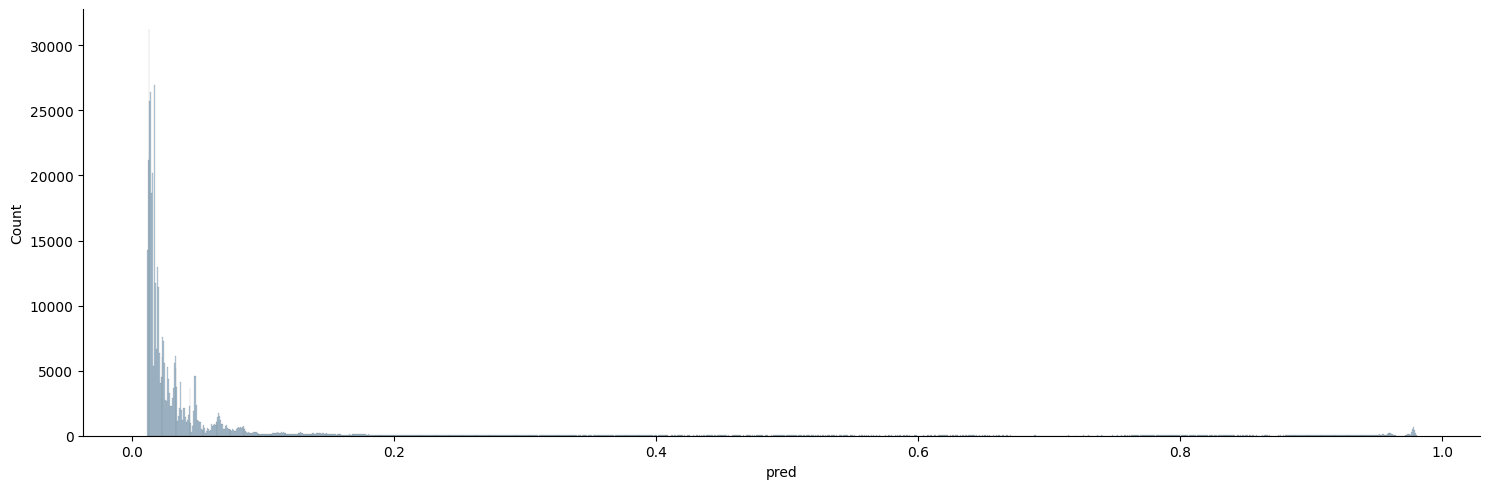

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.figure(figsize=(100, 20))
sns.displot(pred['pred'],kde=False, rug=False, alpha = 0.3, height = 5, aspect = 3)

fraud_rate: 11.9%


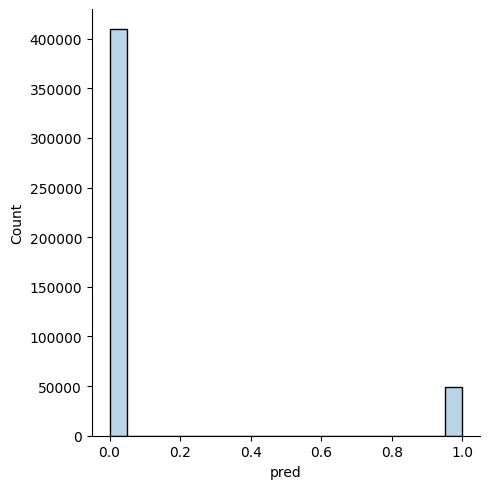

In [ ]:
#閾値を設定し、0,1に分ける。
pred['pred'] = pred['pred'].mask(pred['pred'] >= 0.2, 1)
pred['pred'] = pred['pred'].mask(pred['pred'] < 0.2, 0)
pred['pred'] = pred['pred'].astype('int')

value0 = pred['pred'].value_counts().iloc[0]
value1 = pred['pred'].value_counts().iloc[1]
fraud_rate = round(value1/value0, 3)
print(f'fraud_rate: {fraud_rate:.1%}')

sns.displot(pred['pred'],kde=False, rug=False, alpha = 0.3)

In [ ]:
pred.to_csv('/content/drive/MyDrive/Signate/MUFG Data Science Champion Ship 2023/pred_files/pred10.csv', header=False, index=False)

In [ ]:
csv = pd.read_csv('/content/drive/MyDrive/Signate/MUFG Data Science Champion Ship 2023/pred_files/pred10.csv', header=None)
csv